# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [1]:
import numpy as np
import pandas as pd

with open('./dataset/dataset.npz', 'rb') as file:
    data = np.load(file)
    train, test = pd.DataFrame(data['train']), pd.DataFrame(data['test'])

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [2]:
print(f'Train Samples: {len(train)}')
print(f'Test Samples: {len(test)}')

Train Samples: 2244
Test Samples: 1496


In [3]:
class_samples = pd.DataFrame({'Train':train[0].value_counts(), 'Test':test[0].value_counts()})
class_samples = class_samples.sort_index()
display(class_samples)

,Train,Test
1.0,77,55
2.0,66,44
3.0,55,55
4.0,66,22
5.0,77,55
6.0,44,44
7.0,44,66
8.0,33,88
9.0,121,33
10.0,88,55


### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [4]:
train_new = train[(train[0] == 3) | (train[0] == 5)]
test_new = test[(test[0] == 3) | (test[0] == 5)]

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
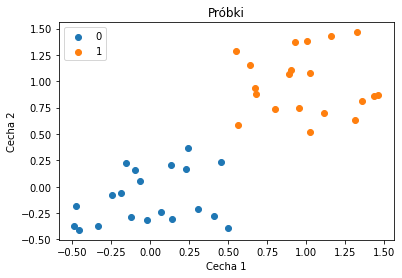

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

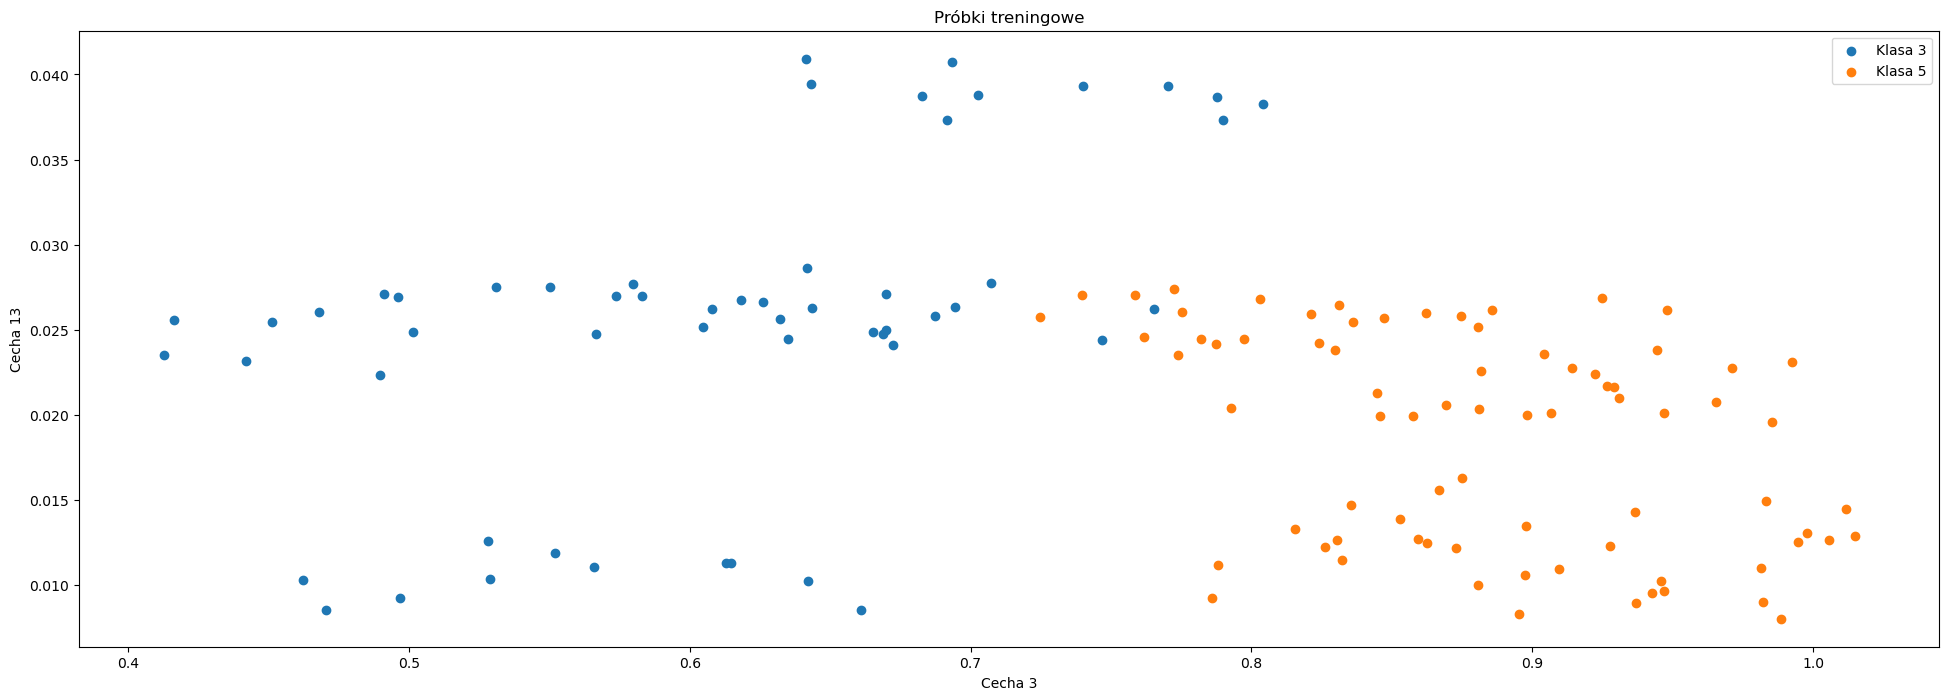

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
plt.title('Próbki treningowe')
plt.xlabel('Cecha 3')
plt.ylabel('Cecha 13')
plt.scatter(x=train_new[train_new[0] == 3][2], y=train_new[train_new[0] == 3][12], label='Klasa 3')
plt.scatter(x=train_new[train_new[0] == 5][2], y=train_new[train_new[0] == 5][12], label='Klasa 5')
plt.legend()
plt.show()

### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `x` oraz `y` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [6]:
def edist(x, y, features):
    result = 0.0
    for feature in features:
        result += np.square(x[feature] - y[feature])
    return np.sqrt(result)

In [7]:
features = [1, 2] # kolumny o indeksach 1, 2
x = [0, 2, 3]
y = [0, 5, 6]

print(edist(x, y, features)) # 4.242640687119285

4.242640687119285


### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


In [8]:
from cmath import inf

def classify(test, train, features):
    for test_index, test_row in test.iterrows():
        smallest_distance = inf
        test.loc[test_index, 0] = 0
        for train_index, train_row in train.iterrows():
            distance = edist(np.array(test_row), np.array(train_row), features)
            if distance < smallest_distance:
                smallest_distance = distance
                test.loc[test_index, 0] = train.loc[train_index, 0]

### Zadanie 7
Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

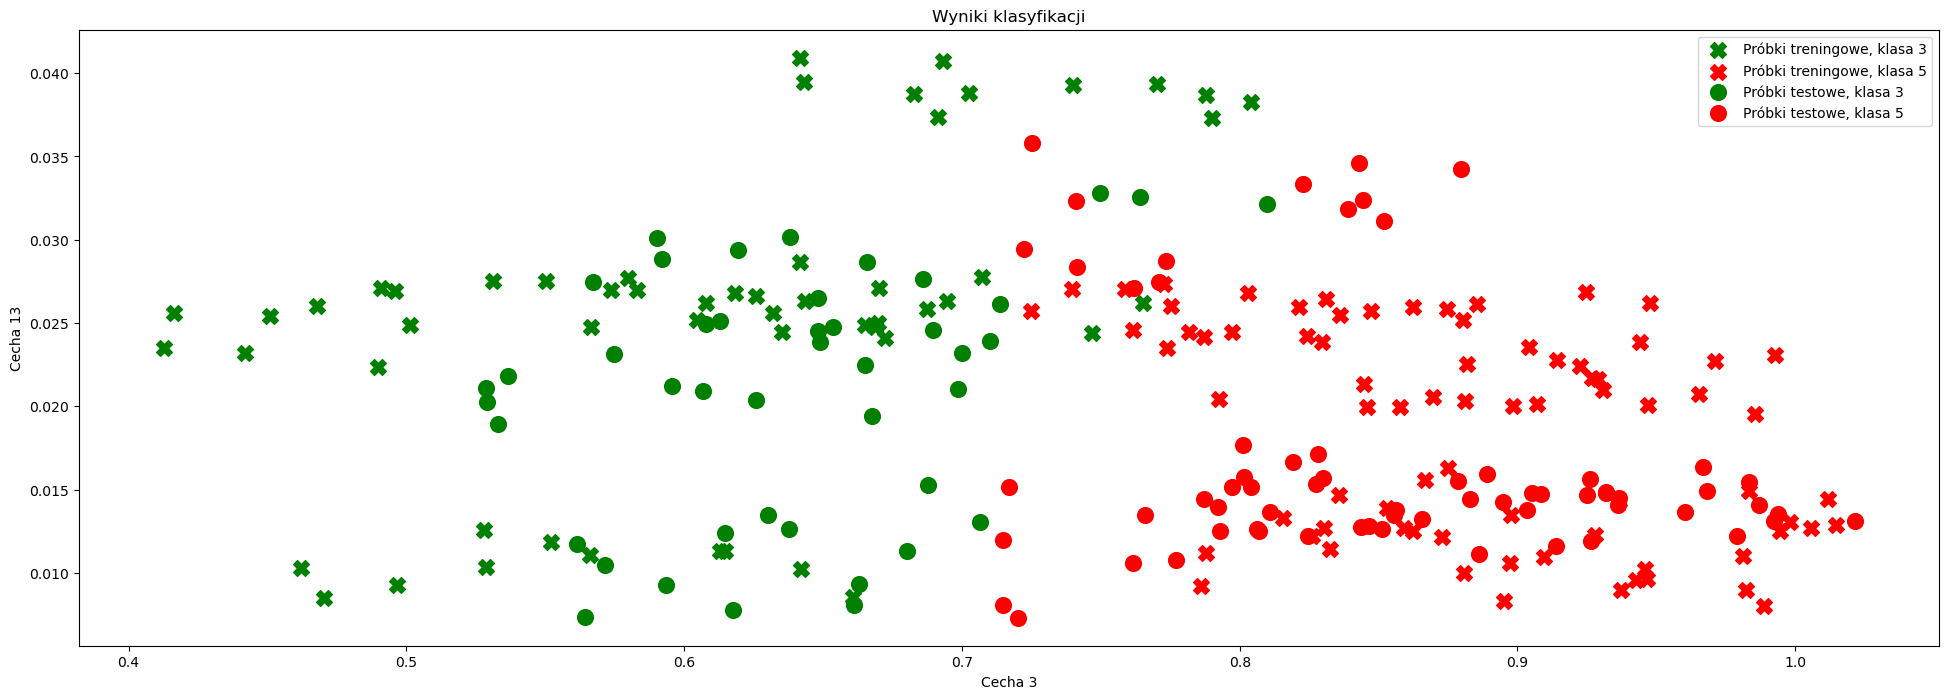

In [9]:
test_new_copy = test_new.copy()

classify(test_new_copy, train_new, [2, 12])

plt.figure(figsize=(24, 8))
plt.title('Wyniki klasyfikacji')
plt.xlabel('Cecha 3')
plt.ylabel('Cecha 13')
plt.scatter(x=train_new[train_new[0] == 3][2], y=train_new[train_new[0] == 3][12], label='Próbki treningowe, klasa 3', marker='X', c='green', s=128)
plt.scatter(x=train_new[train_new[0] == 5][2], y=train_new[train_new[0] == 5][12], label='Próbki treningowe, klasa 5', marker='X', c='red', s=128)
plt.scatter(x=test_new_copy[test_new_copy[0] == 3][2], y=test_new_copy[test_new_copy[0] == 3][12], label='Próbki testowe, klasa 3', marker='o', c='green', s=128)
plt.scatter(x=test_new_copy[test_new_copy[0] == 5][2], y=test_new_copy[test_new_copy[0] == 5][12], label='Próbki testowe, klasa 5', marker='o', c='red', s=128)
plt.legend()
plt.show()

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [10]:
classification_results = pd.concat([test_new[0], test_new_copy[0]], ignore_index=True, axis=1).reset_index()
classification_results.rename(columns={0: 'train', 1: 'test'}, inplace=True)

In [11]:
def get_classification_accuracy(classification_results) -> float:
    accurate_classifications = len(classification_results[classification_results['train'] == classification_results['test']])
    return format(accurate_classifications / len(classification_results) * 100, '.2f')

In [12]:
print(f'Accuracy: {get_classification_accuracy(classification_results)}%')

Accuracy: 84.55%


### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty doku w wkleić w komórkę poniżej zmieniając liczbę klas.

In [13]:
train_new = train[train[0].isin([4, 6, 8, 10, 12])]
test_new = test[test[0].isin([4, 6, 8, 10, 12])]
test_new_copy = test_new.copy()

classify(test_new_copy, train_new, [2, 12])

classification_results = pd.concat([test_new[0], test_new_copy[0]], ignore_index=True, axis=1).reset_index()
classification_results.rename(columns={0: 'train', 1: 'test'}, inplace=True)

print(f'Accuracy: {get_classification_accuracy(classification_results)}%')

Accuracy: 75.38%


### Zadanie 10

Przeprowadź eksperyment ponownie dla takich samych parametrów jak w zad. 9, ale większej liczby cech.

In [14]:
train_new = train[train[0].isin([4, 6, 8, 10, 12])]
test_new = test[test[0].isin([4, 6, 8, 10, 12])]
test_new_copy = test_new.copy()

classify(test_new_copy, train_new, [3, 5, 7, 9, 11])

classification_results = pd.concat([test_new[0], test_new_copy[0]], ignore_index=True, axis=1).reset_index()
classification_results.rename(columns={0: 'train', 1: 'test'}, inplace=True)

print(f'Accuracy: {get_classification_accuracy(classification_results)}%')

Accuracy: 98.48%


### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

In [15]:
"""
Zwiększenie ilości klasyfikowanych klas liści zmniejsza dokładność klasyfikacji.
Podobnie, zwiększenie przedziału cech liści (features), które klasyfikacja bierze pod uwagę, zwiększa jej dokładność.
Dokładność klasyfikacji zależy też od różnicy w cechach wybrany do klasyfikacji.
W przypadku klas liści, które mają bardzo podobne cechy, algorytm NN częściej będzie przypisywał niepoprawną klasę do klasyfikowanej próbki.
"""

'\nZwiększenie ilości klasyfikowanych klas liści zmniejsza dokładność klasyfikacji.\nPodobnie, zwiększenie przedziału cech liści (features), które klasyfikacja bierze pod uwagę, zwiększa jej dokładność.\nDokładność klasyfikacji zależy też od różnicy w cechach wybrany do klasyfikacji.\nW przypadku klas liści, które mają bardzo podobne cechy, algorytm NN częściej będzie przypisywał niepoprawną klasę do klasyfikowanej próbki.\n'